# Plot validation sites
- This script is used to plot four observation sites for model validation. 

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap,BoundaryNorm
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
import string
from matplotlib.ticker import ScalarFormatter
import matplotlib.patches as mpatches
from staticmap import StaticMap, CircleMarker, Line
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [2]:
crs = "EPSG:4326"
shapefile_path = home_path + 'dataset/Office_for_National_Statistics/county_boundary/Counties_and_Unitary_Authorities_December_2023_Boundaries_UK_BSC_4915494739307740134/CTYUA_DEC_2023_UK_BSC.shp'
gdf = gpd.read_file(shapefile_path)
gdf_platecarree = gdf.to_crs(crs)
gdf_platecarree

,CTYUA23CD,CTYUA23NM,CTYUA23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E06000001,Hartlepool,None,447160,531474,-1.27018,54.6761,cac38353-d18e-41b0-8952-f7f074e02c99,"MULTIPOLYGON (((-1.24192 54.72271, -1.24251 54..."
1,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.5447,32fd4486-f372-4653-8ec0-dd0c2a5efb99,"MULTIPOLYGON (((-1.23125 54.58606, -1.229 54.5..."
2,E06000003,Redcar and Cleveland,None,464361,519597,-1.00608,54.5675,346eb7dc-818b-4e30-b1b4-c4fdb0d90818,"POLYGON ((-1.1188 54.62885, -1.08461 54.62039,..."
3,E06000004,Stockton-on-Tees,None,444940,518179,-1.30664,54.5569,b73461f7-e9ce-44c6-b171-6bcc24a77ec2,"MULTIPOLYGON (((-1.20073 54.62301, -1.20523 54..."
4,E06000005,Darlington,None,428029,515648,-1.56835,54.5353,f5516d6b-2416-45a1-9818-f8ae39d02798,"POLYGON ((-1.64162 54.61936, -1.63323 54.61612..."
...,...,...,...,...,...,...,...,...,...
213,W06000020,Torfaen,Torfaen,327459,200480,-3.05101,51.6984,19993d3f-0812-420e-bd8c-004ce9615e40,"POLYGON ((-3.03389 51.72551, -3.02541 51.71813..."
214,W06000021,Monmouthshire,Sir Fynwy,337812,209231,-2.90280,51.7783,c915c467-0c13-48f6-9a79-ac3634c059fa,"POLYGON ((-3.05205 51.97286, -3.05189 51.97258..."
215,W06000022,Newport,Casnewydd,337897,187432,-2.89769,51.5823,85cbf27a-c2b9-469e-a83e-41e6128a5d82,"POLYGON ((-2.8285 51.64282, -2.80567 51.62372,..."
216,W06000023,Powys,Powys,302329,273254,-3.43531,52.3486,68948aa5-52ea-476f-a431-6887efe52e5f,"POLYGON ((-3.15484 52.89808, -3.1475 52.89015,..."


In [3]:
greater_manchester_counties = ['Bolton', 'Bury', 'Manchester', 'Oldham', 'Rochdale','Salford', 'Stockport', 'Tameside', 'Trafford', 'Wigan']
gdf_greater_manchester = gdf_platecarree[gdf_platecarree['CTYUA23NM'].isin(greater_manchester_counties)]

In [4]:
ds_wrf = xr.open_dataset(f'{home_path}0_WRFvsWRF-CTSM/input/WRF-CTSM/d04/wrfinput_d01')
ds_wrf

<xarray.Dataset> Size: 13MB
Dimensions:               (Time: 1, south_north: 45, west_east: 57,
                           bottom_top: 43, bottom_top_stag: 44,
                           soil_layers_stag: 4, dust_erosion_dimension: 3,
                           west_east_stag: 58, south_north_stag: 46,
                           DIM0010: 5, land_cat_stag: 21, soil_cat_stag: 16,
                           urban_wind_directions_stag: 4, month_hour: 288,
                           num_ext_model_couple_dom_stag: 1)
Coordinates:
    XLAT                  (Time, south_north, west_east) float32 10kB ...
    XLONG                 (Time, south_north, west_east) float32 10kB ...
    XLAT_U                (Time, south_north, west_east_stag) float32 10kB ...
    XLONG_U               (Time, south_north, west_east_stag) float32 10kB ...
    XLAT_V                (Time, south_north_stag, west_east) float32 10kB ...
    XLONG_V               (Time, south_north_stag, west_east) float32 10kB ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                dust_erosion_dimension, west_east_stag,
                                south_north_stag, DIM0010, land_cat_stag,
                                soil_cat_stag, urban_wind_directions_stag,
                                month_hour, num_ext_model_couple_dom_stag
Data variables: (12/195)
    Times                 (Time) |S19 19B ...
    LU_INDEX              (Time, south_north, west_east) float32 10kB ...
    ZNU                   (Time, bottom_top) float32 172B ...
    ZNW                   (Time, bottom_top_stag) float32 176B ...
    ZS                    (Time, soil_layers_stag) float32 16B ...
    DZS                   (Time, soil_layers_stag) float32 16B ...
    ...                    ...
    C4F                   (Time, bottom_top_stag) float32 176B ...
    PCB                   (Time, south_north, west_east) float32 10kB ...
    PC                    (Time, south_north, west_east) float32 10kB ...
    LANDMASK              (Time, south_north, west_east) float32 10kB ...
    LAKEMASK              (Time, south_north, west_east) float32 10kB ...
    SST                   (Time, south_north, west_east) float32 10kB ...
Attributes: (12/92)
    TITLE:                            OUTPUT FROM NDOWN_EM V4.7.0 PREPROCESSOR
    START_DATE:                      2021-12-25_00:00:00
    SIMULATION_START_DATE:           2021-12-25_00:00:00
    WEST-EAST_GRID_DIMENSION:        58
    SOUTH-NORTH_GRID_DIMENSION:      46
    BOTTOM-TOP_GRID_DIMENSION:       44
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      0
    ETAC:                            0.0

In [5]:
ds_wrf_lndindex = ds_wrf['LU_INDEX'][0]
ds_wrf_lndindex
# 
'''
1,     12.,   .30,   .95,   50.,    4.,  3.33, 29.2e5, 'Evergreen Needleleaf Forest'
2,     12.,   .50,   .95,   50.,    5.,  1.67, 29.2e5, 'Evergreen Broadleaf Forest'
3,     14.,   .30,   .94,   50.,    4.,  2.86, 25.0e5, 'Deciduous Needleleaf Forest'
4,     16.,   .30,   .93,   50.,    4.,  2.63, 25.0e5, 'Deciduous Broadleaf Forest'
5,     13.,   .30,   .97,   50.,    4.,  2.11, 41.8e5, 'Mixed Forests'
6,     22.,   .10,   .93,    5.,    3.,  1.56, 20.8e5, 'Closed Shrublands'
7,     20.,   .15,   .95,    6.,    3.,  2.14, 20.8e5, 'Open Shrublands'
8,     22.,   .10,   .93,    5.,    3.,  1.56, 20.8e5, 'Woody Savannas'
9,     20.,   .15,   .92,   15.,    3.,  2.00, 25.0e5, 'Savannas'
10,    19.,   .15,   .96,   12.,    3.,  2.37, 20.8e5, 'Grasslands'
11,    14.,   .42,   .95,   30.,   5.5,  1.32, 35.5e5, 'Permanent wetlands'
12,    17.,   .30,  .985,   15.,    4.,  2.71, 25.0e5, 'Croplands'
13,    15.,   .10,   .88,   80.,    3.,  1.67, 18.9e5, 'Urban and Built-Up'
14,    18.,   .25,   .98,   14.,    4.,  2.56, 25.0e5, 'cropland/natural vegetation mosaic'
15,    55.,   .95,   .95,   0.1,    5.,    0., 9.0e25, 'Snow and Ice'
16,    25.,   .02,   .90,    1.,    2.,  0.81, 12.0e5, 'Barren or Sparsely Vegetated'
17,     8.,   1.0,   .98,  0.01,    6.,    0., 9.0e25, 'Water'
18,    15.,   .50,   .93,   30.,    5.,  2.67, 9.0e25, 'Wooded Tundra'
19,    15.,   .50,   .92,   15.,    5.,  2.67, 9.0e25, 'Mixed Tundra'
20,    25.,   .02,   .90,   10.,    2.,  1.60, 12.0e5, 'Barren Tundra'
'''

"\n1,     12.,   .30,   .95,   50.,    4.,  3.33, 29.2e5, 'Evergreen Needleleaf Forest'\n2,     12.,   .50,   .95,   50.,    5.,  1.67, 29.2e5, 'Evergreen Broadleaf Forest'\n3,     14.,   .30,   .94,   50.,    4.,  2.86, 25.0e5, 'Deciduous Needleleaf Forest'\n4,     16.,   .30,   .93,   50.,    4.,  2.63, 25.0e5, 'Deciduous Broadleaf Forest'\n5,     13.,   .30,   .97,   50.,    4.,  2.11, 41.8e5, 'Mixed Forests'\n6,     22.,   .10,   .93,    5.,    3.,  1.56, 20.8e5, 'Closed Shrublands'\n7,     20.,   .15,   .95,    6.,    3.,  2.14, 20.8e5, 'Open Shrublands'\n8,     22.,   .10,   .93,    5.,    3.,  1.56, 20.8e5, 'Woody Savannas'\n9,     20.,   .15,   .92,   15.,    3.,  2.00, 25.0e5, 'Savannas'\n10,    19.,   .15,   .96,   12.,    3.,  2.37, 20.8e5, 'Grasslands'\n11,    14.,   .42,   .95,   30.,   5.5,  1.32, 35.5e5, 'Permanent wetlands'\n12,    17.,   .30,  .985,   15.,    4.,  2.71, 25.0e5, 'Croplands'\n13,    15.,   .10,   .88,   80.,    3.,  1.67, 18.9e5, 'Urban and Built-Up'\n14

In [6]:
lnd_cat = np.unique(ds_wrf_lndindex)
lnd_cat

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 10., 12., 13., 14., 16.,
       17.], dtype=float32)

In [7]:
ds_ctsm = xr.open_dataset(f'{home_path}0_WRFvsWRF-CTSM/input/WRF-CTSM/surfdata_1.2x1.2_SSP5-8.5_2022_78pfts_c250607.nc')
ctsm_lat = ds_ctsm['LATIXY'][:,0]
ctsm_lon = ds_ctsm['LONGXY'][0]

In [8]:
city_center_lat = ctsm_lat[18].values
city_center_lon = ctsm_lon[30].values - 360
print(f'City center coordinates: ({city_center_lat}, {city_center_lon})')

City center coordinates: (53.46884536743164, -2.239776611328125)


In [9]:
southwest_index_list = []

with open('../skin_temperature_section/data_for_figure/southwest_index_list.txt', 'r') as f:
    for line in f:
        row, col = line.strip().split(',')  # split by comma
        southwest_index_list.append((int(row), int(col)))  # convert to int and store as tuple

print(southwest_index_list)

[(0, 11), (1, 12), (2, 13), (3, 14), (4, 15), (5, 16), (6, 17), (7, 18), (8, 19), (9, 20), (10, 21), (11, 22), (12, 23), (13, 24), (14, 25), (15, 26), (16, 27), (17, 28), (18, 29), (19, 30), (20, 31), (21, 32), (22, 33), (23, 34), (24, 35), (25, 36), (26, 37), (27, 38), (28, 39), (29, 40), (30, 41), (31, 42), (32, 43), (33, 44), (34, 45), (35, 46), (36, 47), (37, 48), (38, 49), (39, 50), (40, 51), (41, 52), (42, 53), (43, 54), (44, 55)]


In [10]:
df_section = pd.read_csv('../skin_temperature_section/data_for_figure/section_info.csv')
df_section.head()

,lat,lon,index_lat,index_lon
0,53.274712,-2.582367,0,11
1,53.285488,-2.564331,1,12
2,53.296276,-2.546295,2,13
3,53.307060,-2.528259,3,14
4,53.317844,-2.510223,4,15


In [11]:
proj = ccrs.PlateCarree()
labelcolor = '#6b6b6b'
#colors = plt.cm.tab20.colors[:len(lnd_cat)]
#cmap = ListedColormap(colors)
my_colors = [
    '#006400',  # 1 Evergreen Needleleaf Forest
    '#228B22',  # 2 Evergreen Broadleaf Forest
    '#66CDAA',  # 3 Deciduous Needleleaf Forest
    '#32CD32',  # 4 Deciduous Broadleaf Forest
    '#8FBC8F',  # 5 Mixed Forests
    '#A0522D',  # 6 Closed Shrublands
    '#CD853F',  # 7 Open Shrublands
    '#DEB887',  # 8 Woody Savannas
    '#FFFF99',  # 10 Grasslands
    '#FFD700',  # 12 Croplands
    #'#B22222',  # 13 Urban and Built-Up
    labelcolor,
    '#D2B48C',  # 14 Cropland/Natural Veg Mosaic
    '#DEDEDE',  # 16 Barren or Sparsely Vegetated
    '#1E90FF',  # 17 Water
]

cmap = ListedColormap(my_colors)
bounds = np.arange(len(lnd_cat) + 1) - 0.5
norm = BoundaryNorm(bounds, ncolors=len(lnd_cat))
cbar_pad = 0.075
cbar_aspect = 60
cbar_shrink = 0.8
category_to_index = {val: idx for idx, val in enumerate(lnd_cat)}
ds_wrf_lndindex_mapped = np.vectorize(category_to_index.get)(ds_wrf_lndindex)
linewidth = 0.5
boundarywidth = 0.5
ax23_extent = [ctsm_lon.min().item()-360, ctsm_lon.max().item()-360, ctsm_lat.min().item(), ctsm_lat.max().item()]
labelsize = 6
tick_length = 2
ticklabel_pad = 0.1
stations = {
    "HadISD station": (-2.280893, 53.355540), #(-2.275, 53.354)
    "MAQS station": (-2.21449, 53.44422),
    "Whitworth station": (-2.23210, 53.46745),
    #"QuantAQ sensor": (-2.23, 53.48)
}
i1=23
i2=36
j1=12
j2=25
subset_lon = ctsm_lon[i1:i2]
subset_lat = ctsm_lat[j1:j2]
subset_lon_min, subset_lon_max = subset_lon.min(), subset_lon.max()
subset_lat_min, subset_lat_max = subset_lat.min(), subset_lat.max()
padding=4
marker = 'o'
markersize = 1
linestyle = '-'

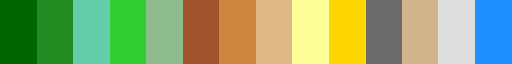

In [10]:
cmap

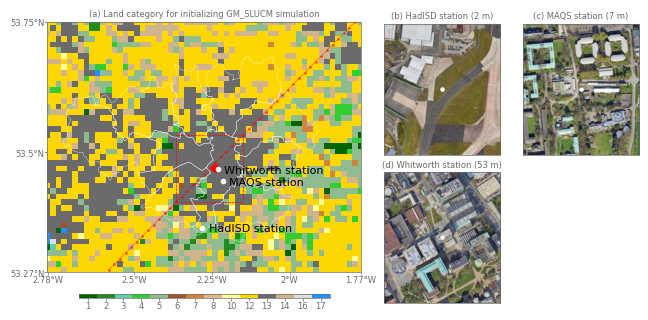

In [12]:
fig = plt.figure(figsize=(6.5, 3.1))
gs = gridspec.GridSpec(2, 3, width_ratios=[2.7, 1, 1])
ax = fig.add_subplot(gs[:, 0], projection=proj)
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 1])
#ax4 = fig.add_subplot(gs[1, 2])
cm_wrf = ax.pcolormesh(
    ctsm_lon, ctsm_lat, ds_wrf_lndindex_mapped,
    norm=norm, cmap=cmap, transform=proj
)
rect = mpatches.Rectangle(
    (subset_lon_min, subset_lat_min),           # lower-left corner
    subset_lon_max - subset_lon_min,            # width
    subset_lat_max - subset_lat_min,            # height
    linewidth=linewidth,
    edgecolor='red',
    facecolor='none',
    linestyle='--',
    transform=ccrs.PlateCarree()
)
ax.add_patch(rect) 
ax.plot(city_center_lon, city_center_lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
ax.set_extent(ax23_extent, crs=proj)
ax.set_xticks([np.round(ax23_extent[0],2), -2.5, -2.25, -2, np.round(ax23_extent[1],2)], crs=proj)  
ax.set_yticks([np.round(ax23_extent[2],2),  53.5, np.round(ax23_extent[3],2)], crs=proj)
ax.tick_params(axis='y', labelleft = True, labelsize=labelsize, length=tick_length, pad=ticklabel_pad, width=boundarywidth, colors=labelcolor)    
ax.tick_params(axis='x', labelsize=labelsize, length=tick_length, pad=ticklabel_pad, width=boundarywidth, colors=labelcolor)
gdf_greater_manchester.plot(ax=ax, edgecolor='white', linewidth = linewidth/2, facecolor='none', transform=proj)
ax.set_title("(a) Land category for initializing GM_SLUCM simulation", fontsize=labelsize, color=labelcolor, pad=padding)
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.plot(df_section['lon'], df_section['lat'], marker = marker, markersize = markersize, linewidth = linewidth, color='red', 
               linestyle = linestyle, transform=proj, alpha = 0.5)
#ax2_cbar = plt.colorbar(cm_wrf, ax=ax2, orientation='horizontal', pad=cbar_pad, aspect=cbar_aspect, shrink=cbar_shrink, extend='neither', fraction=0.03)
cbar = plt.colorbar(
    cm_wrf, ax=ax, orientation='horizontal',
    pad=cbar_pad, aspect=cbar_aspect, shrink=cbar_shrink,
    extend='neither', fraction=0.05
)
for spine in ax.spines.values():
    spine.set_linewidth(boundarywidth)
    spine.set_edgecolor(labelcolor)
cbar.set_ticks(np.arange(len(lnd_cat)))
cbar.set_ticklabels([str(int(c)) for c in lnd_cat])
#cbar.set_label("Land category for GM_NOAH-SLUCM simulation", fontsize=labelsize, color=labelcolor)
offset_text = cbar.ax.yaxis.get_offset_text()
offset_text.set(size=labelsize, color=labelcolor)
offset_text.set_position((5, 1))
cbar.ax.tick_params(which='major', length=2,labelsize=labelsize, pad = 0.05, width=boundarywidth, colors=labelcolor)
cbar.ax.tick_params(which='minor', length=0, labelsize=0)
cbar.outline.set_linewidth(boundarywidth)
cbar.outline.set_edgecolor(labelcolor)
cbar.ax.yaxis.label.set_color(labelcolor)
cbar.ax.set_position([0.25, -0.5, 0.5, 0.5])
for name, (lon, lat) in stations.items():
    ax.plot(lon, lat, marker='o', color='white', markersize=3, transform=ccrs.PlateCarree())
    if name == 'QuantAQ sensor':
        lat_offset = 0.0025
    else:
        lat_offset = 0.0075    
    ax.text(lon + 0.02, lat-lat_offset, name, fontsize=labelsize+2, transform=ccrs.PlateCarree())   

for idx, ax_i in enumerate([ax1, ax2, ax3]): #, ax4
    station_lon, station_lat = stations[list(stations.keys())[idx]]
    m = StaticMap(400, 450, url_template="https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}")
    m.add_marker(CircleMarker((station_lon, station_lat), color= "white",  width=15))  # Flux site
    image = m.render()
    ax_i.imshow(image)
    ax_i.set_xticks([])
    ax_i.set_yticks([])
    ax_i.tick_params(axis='x', labelleft=False, labelbottom=False, labelright=False, labeltop=False)
    for spine in ax_i.spines.values():
        spine.set_linewidth(boundarywidth)
        spine.set_edgecolor(labelcolor) 
    ax_i.set_title(['(b) HadISD station (2 m)', '(c) MAQS station (7 m)', '(d) Whitworth station (53 m)', '(e) QuantAQ sensor (3 m)'][idx], fontsize=labelsize, color=labelcolor, pad=padding)  
plt.subplots_adjust(left=0.065, right=0.975, bottom=0.025, top=0.96, wspace=0.125, hspace=0.05) 
fig.savefig('map_analysis.png', dpi=300)
fig.savefig('map_analysis.pdf', dpi=600)